In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The airplanes and the lounge...
1,✅ Trip Verified | One of the worst experiences...
2,✅ Trip Verified | Cancelled our flight last-m...
3,"✅ Trip Verified | I had a flight from Miami, F..."
4,✅ Trip Verified | We started our day with BA ...


In [4]:
df

,reviews
0,✅ Trip Verified | The airplanes and the lounge...
1,✅ Trip Verified | One of the worst experiences...
2,✅ Trip Verified | Cancelled our flight last-m...
3,"✅ Trip Verified | I had a flight from Miami, F..."
4,✅ Trip Verified | We started our day with BA ...
...,...
995,✅ Trip Verified | We have been loyal customer...
996,✅ Trip Verified | Gatwick to Las Vegas. Board...
997,Not Verified | Nassau to London. Premium Econ...
998,✅ Trip Verified | Phoenix to Accra via London...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
#removes the tick and trip verified part

In [6]:
df

,reviews
0,"The airplanes and the lounges are worn out, o..."
1,One of the worst experiences on the worst air...
2,Cancelled our flight last-minute then moved ...
3,"I had a flight from Miami, Florida to Dublin,..."
4,We started our day with BA in Prague. The fl...
...,...
995,We have been loyal customers with British Ai...
996,Gatwick to Las Vegas. Boarding by group numb...
997,Nassau to London. Premium Economy on BA is a...
998,Phoenix to Accra via London. I had a great C...


In [7]:
#cleaning the text
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"The airplanes and the lounges are worn out, o...",The airplanes and the lounges are worn out ol...
1,One of the worst experiences on the worst air...,One of the worst experiences on the worst air...
2,Cancelled our flight last-minute then moved ...,Cancelled our flight last minute then moved u...
3,"I had a flight from Miami, Florida to Dublin,...",I had a flight from Miami Florida to Dublin I...
4,We started our day with BA in Prague. The fl...,We started our day with BA in Prague The flig...


In [8]:
import nltk

#divides a text into a list of sentences

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Vinisha
[nltk_data]     Vekaria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vinisha
[nltk_data]     Vekaria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vinisha
[nltk_data]     Vekaria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Vinisha
[nltk_data]     Vekaria\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vinisha Vekaria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"The airplanes and the lounges are worn out, o...",The airplanes and the lounges are worn out ol...,"[(airplanes, n), (lounges, n), (worn, v), (old..."
1,One of the worst experiences on the worst air...,One of the worst experiences on the worst air...,"[(One, None), (worst, a), (experiences, n), (w..."
2,Cancelled our flight last-minute then moved ...,Cancelled our flight last minute then moved u...,"[(Cancelled, v), (flight, n), (last, a), (minu..."
3,"I had a flight from Miami, Florida to Dublin,...",I had a flight from Miami Florida to Dublin I...,"[(flight, n), (Miami, n), (Florida, n), (Dubli..."
4,We started our day with BA in Prague. The fl...,We started our day with BA in Prague The flig...,"[(started, v), (day, n), (BA, n), (Prague, n),..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"The airplanes and the lounges are worn out, o...",The airplanes and the lounges are worn out ol...,"[(airplanes, n), (lounges, n), (worn, v), (old...",airplane lounge wear old break Dallas Heathr...
1,One of the worst experiences on the worst air...,One of the worst experiences on the worst air...,"[(One, None), (worst, a), (experiences, n), (w...",One bad experience bad airline flight delay ...
2,Cancelled our flight last-minute then moved ...,Cancelled our flight last minute then moved u...,"[(Cancelled, v), (flight, n), (last, a), (minu...",Cancelled flight last minute move us onto fl...
3,"I had a flight from Miami, Florida to Dublin,...",I had a flight from Miami Florida to Dublin I...,"[(flight, n), (Miami, n), (Florida, n), (Dubli...",flight Miami Florida Dublin Ireland via Lond...
4,We started our day with BA in Prague. The fl...,We started our day with BA in Prague The flig...,"[(started, v), (day, n), (BA, n), (Prague, n),...",start day BA Prague flight actually leave ti...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"The airplanes and the lounges are worn out, o...",airplane lounge wear old break Dallas Heathr...
1,One of the worst experiences on the worst air...,One bad experience bad airline flight delay ...
2,Cancelled our flight last-minute then moved ...,Cancelled flight last minute move us onto fl...
3,"I had a flight from Miami, Florida to Dublin,...",flight Miami Florida Dublin Ireland via Lond...
4,We started our day with BA in Prague. The fl...,start day BA Prague flight actually leave ti...
...,...,...
995,We have been loyal customers with British Ai...,loyal customer British Airways since little ...
996,Gatwick to Las Vegas. Boarding by group numb...,Gatwick Las Vegas Boarding group number seem...
997,Nassau to London. Premium Economy on BA is a...,Nassau London Premium Economy BA joke Highli...
998,Phoenix to Accra via London. I had a great C...,Phoenix Accra via London great Customer serv...


In [12]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     ------------------- ------------------- 61.4/126.0 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  122.9/126.0 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"The airplanes and the lounges are worn out, o...",The airplanes and the lounges are worn out ol...,"[(airplanes, n), (lounges, n), (worn, v), (old...",airplane lounge wear old break Dallas Heathr...,-0.1764,Negative
1,One of the worst experiences on the worst air...,One of the worst experiences on the worst air...,"[(One, None), (worst, a), (experiences, n), (w...",One bad experience bad airline flight delay ...,-0.9472,Negative
2,Cancelled our flight last-minute then moved ...,Cancelled our flight last minute then moved u...,"[(Cancelled, v), (flight, n), (last, a), (minu...",Cancelled flight last minute move us onto fl...,0.4404,Neutral
3,"I had a flight from Miami, Florida to Dublin,...",I had a flight from Miami Florida to Dublin I...,"[(flight, n), (Miami, n), (Florida, n), (Dubli...",flight Miami Florida Dublin Ireland via Lond...,-0.6718,Negative
4,We started our day with BA in Prague. The fl...,We started our day with BA in Prague The flig...,"[(started, v), (day, n), (BA, n), (Prague, n),...",start day BA Prague flight actually leave ti...,-0.9494,Negative


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    487
Negative    410
Neutral     103
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x144aad9ddd0>,
 [Text(0.04491232669132558, 1.0990827461620767, 'Positive'),
  Text(-0.39205315203326996, -1.027761804106758, 'Negative'),
  Text(1.2799375296229292, -0.4292550759895026, 'Neutral')],
 [Text(0.02449763274072304, 0.599499679724769, '48.7%'),
  Text(-0.21384717383632904, -0.5605973476945951, '41.0%'),
  Text(0.8058865927255479, -0.270271714511909, '10.3%')])

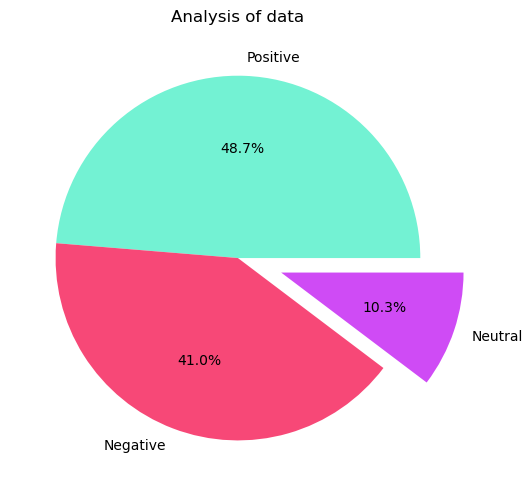

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
custom_colors = ['#73f2d3', '#f74877', '#cf4bf5']
plt.figure(figsize=(20,10))

plt.subplot(1,3,2)
plt.title("Analysis of data")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%',colors=custom_colors)

In [17]:
df.to_csv("BA_reviews.csv")